In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anyas-gojo-revival/sheet2.csv
/kaggle/input/anyas-gojo-revival/sheet1.csv
/kaggle/input/c/anyas-gojo-revival/sample_submission.csv
/kaggle/input/c/anyas-gojo-revival/sheet2.csv
/kaggle/input/c/anyas-gojo-revival/sheet1.csv


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Exploratory Data Analysis




## Loading the Dataset


* ### Imports necessary libraries.
* ### Reads a CSV file named "sheet1.csv" into a DataFrame (df).

In [3]:
df=pd.read_csv("/kaggle/input/anyas-gojo-revival/sheet1.csv")
df

,id,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,t,u,v,target
0,1,15-01-2021,1.5570,27337.8060,17558,4.88,424741,424745.88,101,105,...,443,940,30.63,0.0,0.0,356,27337,1530.0084,00:03:21,5.785
1,2,24-07-2019,1.2616,1553.0296,1231,5.64,21688,21693.64,1,4,...,14,31,27.86,0.0,0.0,8,1553,60.2926,00:02:19,0.826
2,3,09-08-2020,1.8000,4563.0000,2535,6.15,57690,57696.15,27,30,...,162,232,25.98,0.0,0.0,103,4563,230.7383,00:03:02,1.201
3,4,12-06-2019,1.2996,2117.0484,1629,5.76,27800,27805.76,9,3,...,34,64,26.28,0.0,0.0,19,2117,100.3671,00:02:50,0.963
4,5,02-06-2021,2.4762,231408.3186,93453,4.26,4175116,4175120.26,464,417,...,2325,9126,33.26,0.0,0.0,1997,231404,17511.5046,00:04:32,59.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,30-06-2021,2.3033,245207.0147,106459,4.16,4449518,4449522.16,825,423,...,2978,11819,38.56,0.0,0.0,2269,245204,21847.0122,00:05:20,125.014
65,66,20-08-2021,1.8174,584179.6038,321437,5.73,7148710,7148715.73,11582,1405,...,4959,58446,45.70,1.0,2.0,3785,584188,64133.8247,00:06:35,317.818
66,67,24-09-2021,2.1319,652107.7039,305881,6.08,7768271,7768277.08,4741,1055,...,4804,56677,47.81,1.0,0.0,3284,652105,54463.2654,00:05:00,397.066
67,68,28-12-2020,1.6154,23749.6108,14702,4.83,373796,373800.83,110,74,...,487,1106,30.22,0.0,0.0,423,23750,1414.7931,00:03:34,6.017


## Basic Exploration and Summary Statistics
* ### Displays the DataFrame (df) to observe the data.
* ### Computes basic summary statistics for numerical columns.
* ### Plots histograms for each numerical column.

In [4]:
# basic summary statistics of the numerical columns
summary_stats = df.describe()
print(summary_stats)


              id          b              c              d          e  \
count  69.000000  69.000000      69.000000      69.000000  69.000000   
mean   35.000000   1.648032   62417.801312   29880.869565   6.242609   
std    20.062403   0.360947  127075.100701   60728.776208   1.638369   
min     1.000000   1.037000      21.000600      18.000000   3.640000   
25%    18.000000   1.431200     683.001000     505.000000   5.060000   
50%    35.000000   1.545200    8344.803600    5436.000000   5.990000   
75%    52.000000   1.817400   27496.112400   17558.000000   6.960000   
max    69.000000   2.560000  652107.703900  321437.000000  11.420000   

                  f             g             h            i           j  ...  \
count  6.900000e+01  6.900000e+01     69.000000    69.000000   69.000000  ...   
mean   9.788619e+05  9.788682e+05    363.405797   123.565217   96.202754  ...   
std    1.883569e+06  1.883568e+06   1495.362727   246.567046   12.139610  ...   
min    1.970000e+02  2.0563

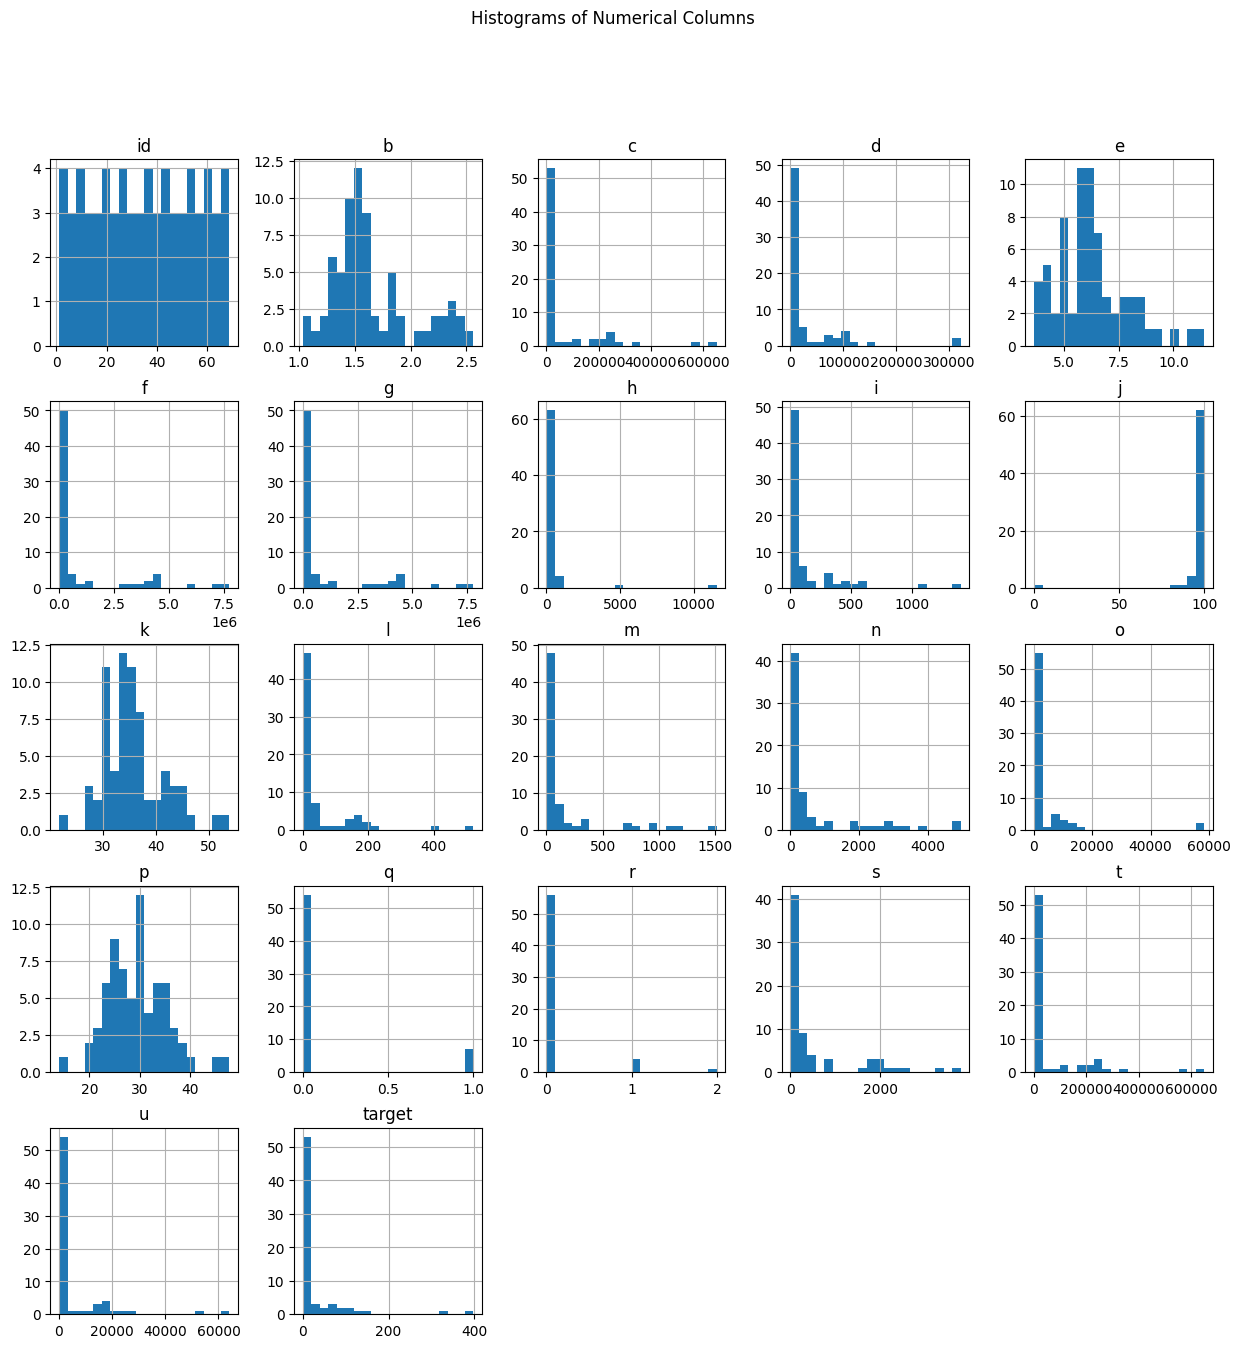

In [5]:
# Plot histograms for each numerical column
df.hist(bins=20, figsize=(15, 15))
plt.suptitle("Histograms of Numerical Columns")
plt.show()


In [6]:
names=["id","Date","avg_views/viewer", "engage_score", "uniq_viewers", "impressions_click-through_rate(%)", "impressions", "impression_score", "comments_added", "shares", "likes_vs_dislikes(%)", "content viewability", "dislikes", "subscribers_lost", "subscribers_gained", "likes", "avg_percentage_viewed(%)", "videos_published", "videos_added", "subs", "views","watch_time", "avg_view_duration","target"]

In [7]:
df.columns=[names]

In [8]:
df.head()

,id,Date,avg_views/viewer,engage_score,uniq_viewers,impressions_click-through_rate(%),impressions,impression_score,comments_added,shares,...,subscribers_gained,likes,avg_percentage_viewed(%),videos_published,videos_added,subs,views,watch_time,avg_view_duration,target
0,1,15-01-2021,1.5570,27337.8060,17558,4.88,424741,424745.88,101,105,...,443,940,30.63,0.0,0.0,356,27337,1530.0084,00:03:21,5.785
1,2,24-07-2019,1.2616,1553.0296,1231,5.64,21688,21693.64,1,4,...,14,31,27.86,0.0,0.0,8,1553,60.2926,00:02:19,0.826
2,3,09-08-2020,1.8000,4563.0000,2535,6.15,57690,57696.15,27,30,...,162,232,25.98,0.0,0.0,103,4563,230.7383,00:03:02,1.201
3,4,12-06-2019,1.2996,2117.0484,1629,5.76,27800,27805.76,9,3,...,34,64,26.28,0.0,0.0,19,2117,100.3671,00:02:50,0.963
4,5,02-06-2021,2.4762,231408.3186,93453,4.26,4175116,4175120.26,464,417,...,2325,9126,33.26,0.0,0.0,1997,231404,17511.5046,00:04:32,59.635


## Data Cleaning and Preprocessing
* ### Renames columns using a predefined list (names).
* ### Drops unnecessary columns ("Date," "avg_view_duration," "id") from the DataFrame (df).

In [9]:
df.isna().any()

id                                   False
Date                                 False
avg_views/viewer                     False
engage_score                         False
uniq_viewers                         False
impressions_click-through_rate(%)    False
impressions                          False
impression_score                     False
comments_added                       False
shares                               False
likes_vs_dislikes(%)                 False
content viewability                  False
dislikes                             False
subscribers_lost                     False
subscribers_gained                   False
likes                                False
avg_percentage_viewed(%)             False
videos_published                      True
videos_added                          True
subs                                 False
views                                False
watch_time                           False
avg_view_duration                    False
target     

In [10]:
print(len(df))

69


In [11]:
df["Date"]

,Date
0,15-01-2021
1,24-07-2019
2,09-08-2020
3,12-06-2019
4,02-06-2021
...,...
64,30-06-2021
65,20-08-2021
66,24-09-2021
67,28-12-2020


In [12]:
df.dtypes

id                                     int64
Date                                  object
avg_views/viewer                     float64
engage_score                         float64
uniq_viewers                           int64
impressions_click-through_rate(%)    float64
impressions                            int64
impression_score                     float64
comments_added                         int64
shares                                 int64
likes_vs_dislikes(%)                 float64
content viewability                  float64
dislikes                               int64
subscribers_lost                       int64
subscribers_gained                     int64
likes                                  int64
avg_percentage_viewed(%)             float64
videos_published                     float64
videos_added                         float64
subs                                   int64
views                                  int64
watch_time                           float64
avg_view_d

In [13]:
df=df.drop(["Date","avg_view_duration","id"],axis="columns")

/tmp/ipykernel_19/2655635133.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(["Date","avg_view_duration","id"],axis="columns")


In [14]:
(df.columns.values)


array([('avg_views/viewer',), ('engage_score',), ('uniq_viewers',),
       ('impressions_click-through_rate(%)',), ('impressions',),
       ('impression_score',), ('comments_added',), ('shares',),
       ('likes_vs_dislikes(%)',), ('content viewability',), ('dislikes',),
       ('subscribers_lost',), ('subscribers_gained',), ('likes',),
       ('avg_percentage_viewed(%)',), ('videos_published',),
       ('videos_added',), ('subs',), ('views',), ('watch_time',),
       ('target',)], dtype=object)

## Correlation Analysis and Feature Selection
* ### Computes the correlation matrix for the DataFrame (corr_matrix).
* ### Identifies features highly correlated with the target variable.

In [15]:
corr_matrix=df.corr()
corr_matrix["target"]

,target
avg_views/viewer,0.532050
engage_score,0.973622
uniq_viewers,0.980656
impressions_click-through_rate(%),-0.295009
impressions,0.903317
impression_score,0.903317
comments_added,0.811305
shares,0.951624
likes_vs_dislikes(%),0.081617
content viewability,0.663584


In [16]:
corr_matrix[corr_matrix["target"]>0.70]["target"]

,target
avg_views/viewer,NaN
engage_score,0.973622
uniq_viewers,0.980656
impressions_click-through_rate(%),NaN
impressions,0.903317
impression_score,0.903317
comments_added,0.811305
shares,0.951624
likes_vs_dislikes(%),NaN
content viewability,NaN


In [17]:
features1=['engage_score', 'uniq_viewers', 'impressions', 'impression_score','target',]

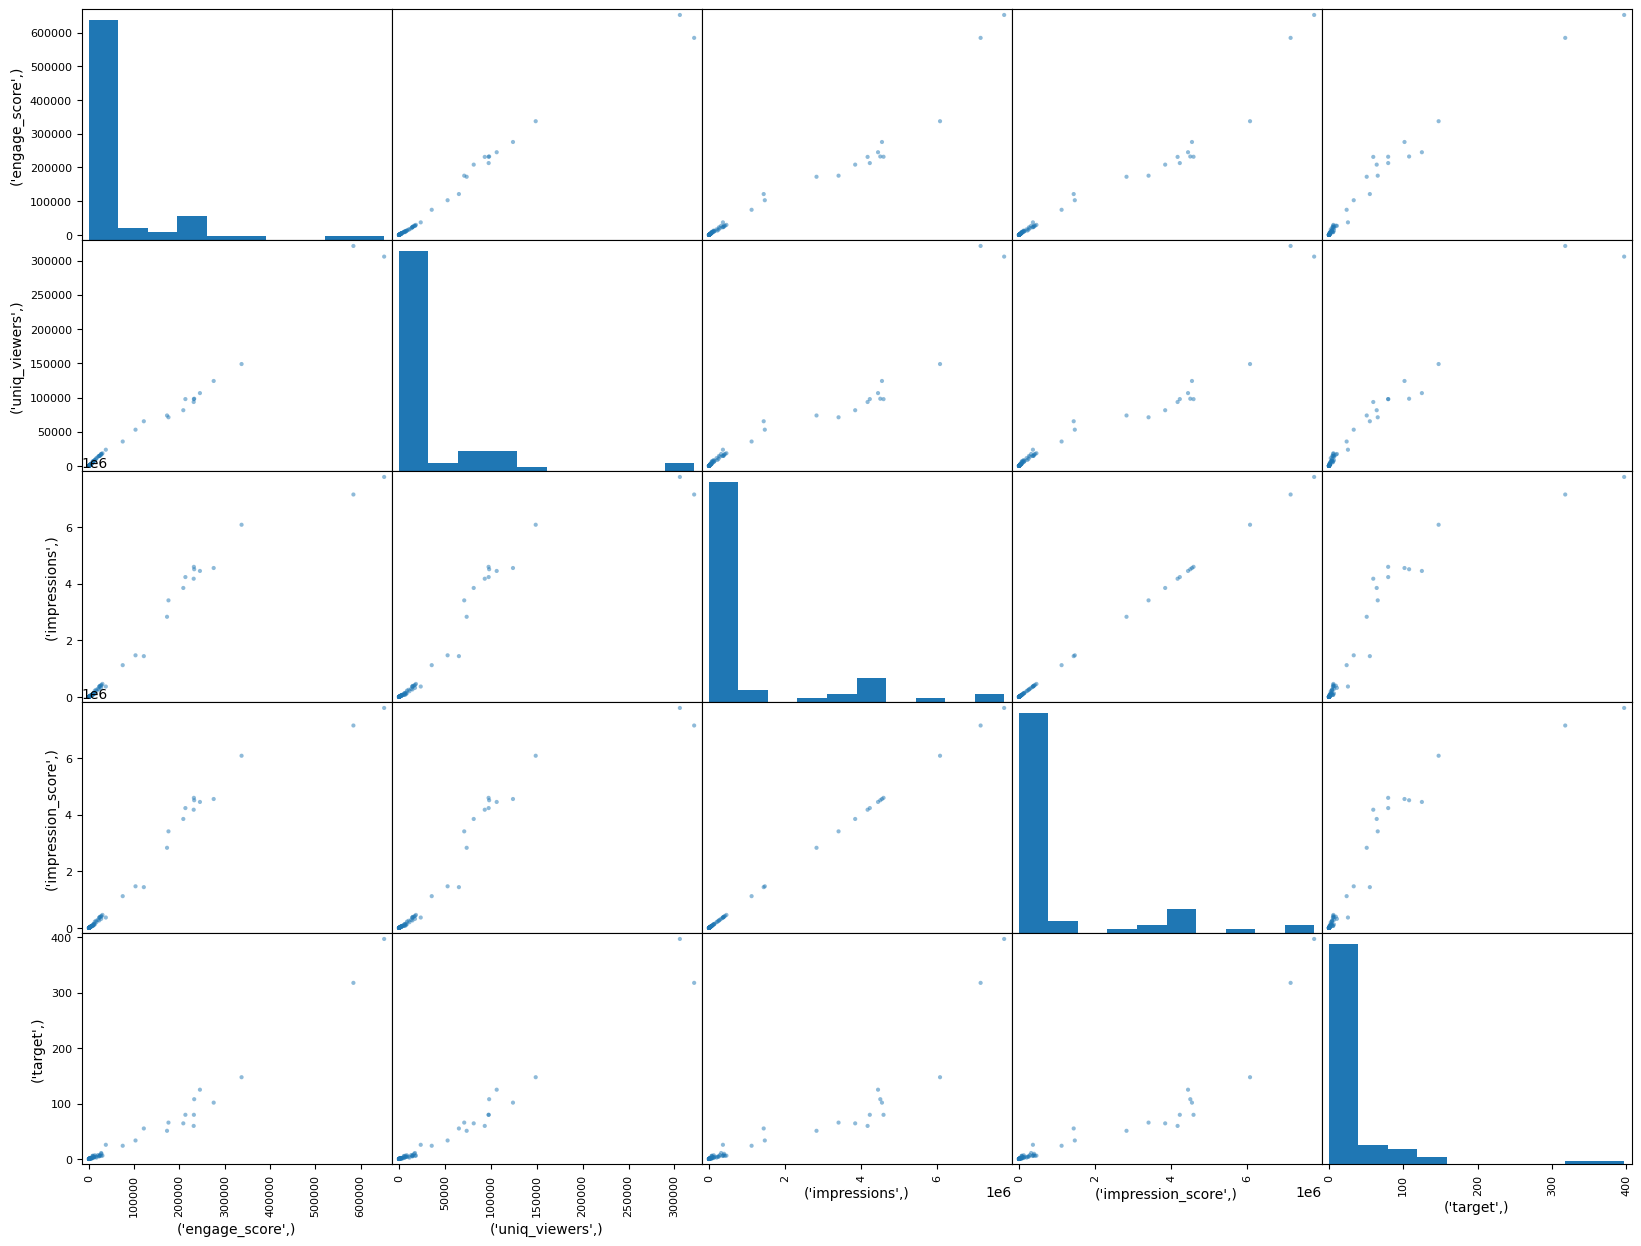

In [18]:
scatter_matrix(df[features1],figsize=(20,15))
plt.show()

In [19]:
features2=['comments_added', 'shares', 'dislikes', 'subscribers_lost',
       'subscribers_gained',"target"]

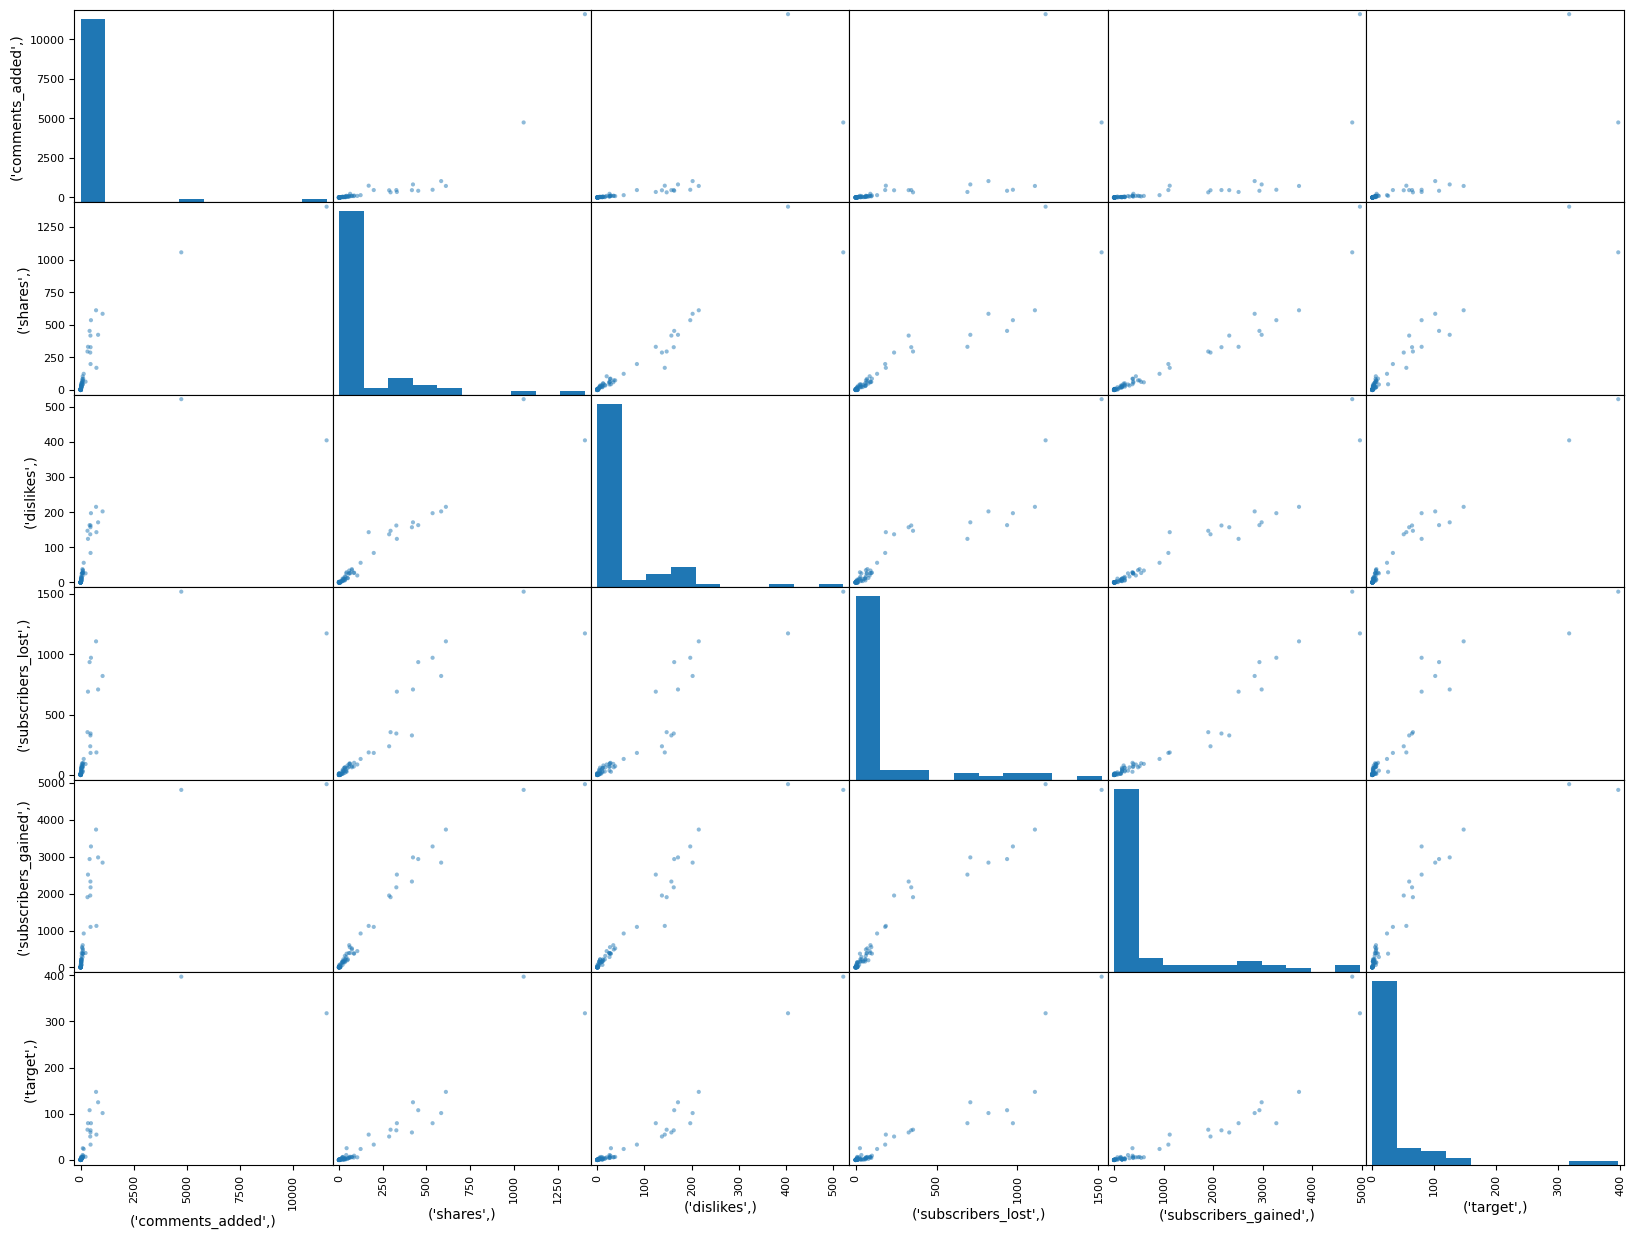

In [20]:
scatter_matrix(df[features2],figsize=(20,15))
plt.show()

In [21]:
features3=[ 'likes', 'avg_percentage_viewed(%)', 'subs',
       'views', 'watch_time',"target"]

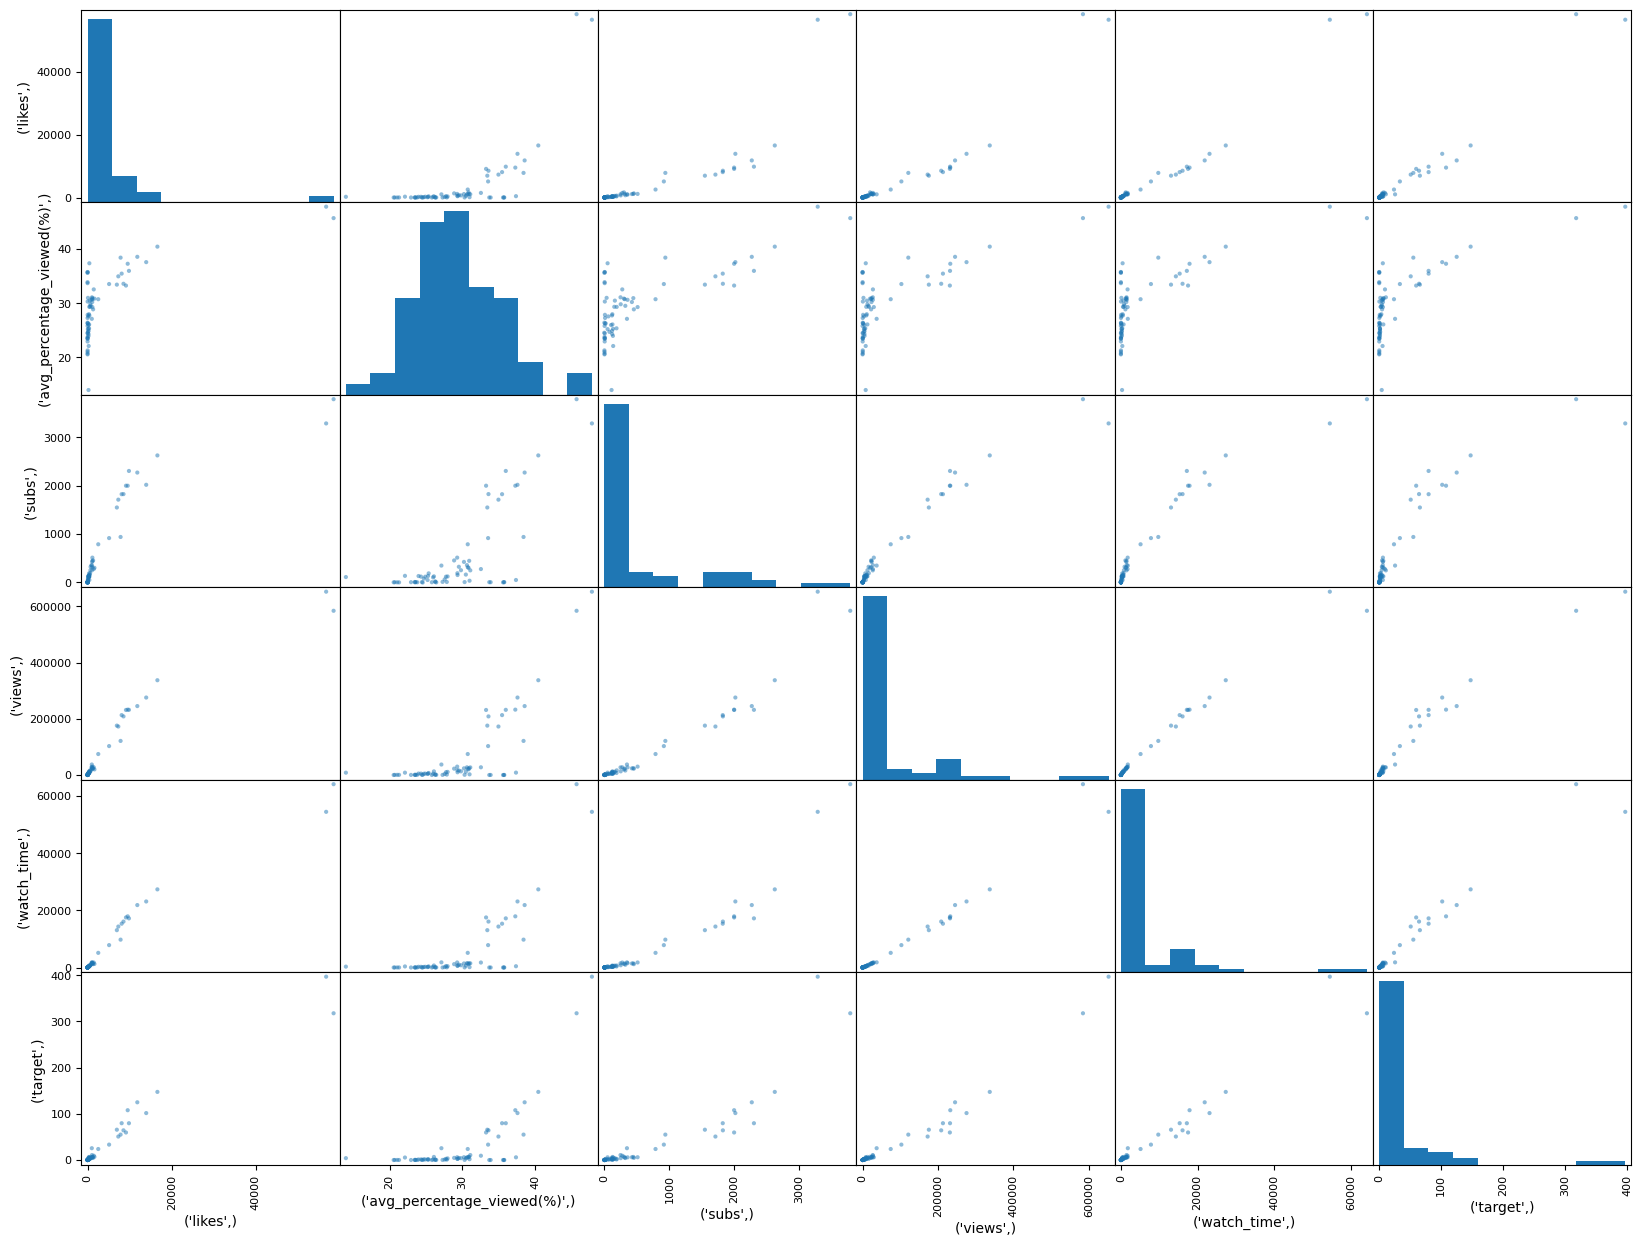

In [22]:
scatter_matrix(df[features3],figsize=(20,15))
plt.show()

In [23]:
df=df.drop(["videos_added","videos_published","content viewability","impressions_click-through_rate(%)","avg_views/viewer","likes_vs_dislikes(%)"],axis="columns")

/tmp/ipykernel_19/2951085181.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(["videos_added","videos_published","content viewability","impressions_click-through_rate(%)","avg_views/viewer","likes_vs_dislikes(%)"],axis="columns")


## Data Imputation and Transformation
* ### Checks for missing values in the DataFrame (df).
* ### Drops columns with missing values.
* ### Uses SimpleImputer to fill missing values in the DataFrame.

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
df=imputer.fit_transform(df)
df=pd.DataFrame(df)

In [26]:
new_names1=["engage_score",
 "uniq_viewers",
 "impressions",
 "impression_score",
 "comments_added",
 "shares",
 "dislikes",
 "subscribers_lost",
 "subscribers_gained",
 "likes",
 "avg_percentage_viewed(%)",
 "subs",
 "views",
 "watch_time",
  "target"]
df.columns=new_names1
df

,engage_score,uniq_viewers,impressions,impression_score,comments_added,shares,dislikes,subscribers_lost,subscribers_gained,likes,avg_percentage_viewed(%),subs,views,watch_time,target
0,27337.8060,17558.0,424741.0,424745.88,101.0,105.0,20.0,87.0,443.0,940.0,30.63,356.0,27337.0,1530.0084,5.785
1,1553.0296,1231.0,21688.0,21693.64,1.0,4.0,1.0,6.0,14.0,31.0,27.86,8.0,1553.0,60.2926,0.826
2,4563.0000,2535.0,57690.0,57696.15,27.0,30.0,11.0,59.0,162.0,232.0,25.98,103.0,4563.0,230.7383,1.201
3,2117.0484,1629.0,27800.0,27805.76,9.0,3.0,0.0,15.0,34.0,64.0,26.28,19.0,2117.0,100.3671,0.963
4,231408.3186,93453.0,4175116.0,4175120.26,464.0,417.0,157.0,328.0,2325.0,9126.0,33.26,1997.0,231404.0,17511.5046,59.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,245207.0147,106459.0,4449518.0,4449522.16,825.0,423.0,171.0,709.0,2978.0,11819.0,38.56,2269.0,245204.0,21847.0122,125.014
65,584179.6038,321437.0,7148710.0,7148715.73,11582.0,1405.0,404.0,1174.0,4959.0,58446.0,45.70,3785.0,584188.0,64133.8247,317.818
66,652107.7039,305881.0,7768271.0,7768277.08,4741.0,1055.0,521.0,1520.0,4804.0,56677.0,47.81,3284.0,652105.0,54463.2654,397.066
67,23749.6108,14702.0,373796.0,373800.83,110.0,74.0,35.0,64.0,487.0,1106.0,30.22,423.0,23750.0,1414.7931,6.017


In [27]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
names_s2=[
 "engage_score",
 "uniq_viewers",
 "impressions",
 "impression_score",
 "comments_added",
 "shares",
 "dislikes",
 "subscribers_lost",
 "subscribers_gained",
 "likes",
 "avg_percentage_viewed(%)",
 "subs",
 "views",
 "watch_time",
 ]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(["target"],axis="columns"),df["target"],test_size=0.4,random_state=8)

## Model Training with Neural Network
* ### Splits the data into training and testing sets.
* ### Standardizes features using MinMaxScaler.
* ### Builds a neural network model with specified architecture and regularization.
* ### Compiles the model with mean squared error loss and Adam optimizer.
* ### Trains the model with early stopping.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [31]:
x_train.isna().sum()

engage_score                0
uniq_viewers                0
impressions                 0
impression_score            0
comments_added              0
shares                      0
dislikes                    0
subscribers_lost            0
subscribers_gained          0
likes                       0
avg_percentage_viewed(%)    0
subs                        0
views                       0
watch_time                  0
dtype: int64

In [32]:
scaled_xtrain=scaler.fit_transform(x_train)
scaled_xtrain=pd.DataFrame(scaled_xtrain)
scaled_xtrain.columns=names_s2


In [33]:
scaled_xtest=scaler.transform(x_test)
scaled_xtest

array([[ 6.37562123e-01,  5.72599805e-01,  7.42397834e-01,
         7.42397608e-01,  3.14368370e-01,  5.05136986e-01,
         7.27722772e-01,  3.65226337e-01,  5.80940745e-01,
         4.99605197e-01,  7.91208791e-01,  6.72166739e-01,
         6.37578705e-01,  5.65472848e-01],
       [ 7.60655946e-03,  1.29744618e-02,  6.00859266e-03,
         6.00797430e-03,  8.67888139e-03,  5.13698630e-03,
         0.00000000e+00,  1.54320988e-02,  1.03848503e-02,
         4.59407078e-03,  5.00203500e-01,  8.68432479e-03,
         7.60646695e-03,  4.29948509e-03],
       [ 7.36711507e-04,  1.08724540e-03,  5.25041680e-04,
         5.24639531e-04,  1.92864031e-03,  1.36986301e-02,
         0.00000000e+00,  0.00000000e+00,  1.83262065e-03,
         6.46041203e-04,  8.84411884e-01,  3.03951368e-03,
         7.36695034e-04,  2.22705653e-04],
       [ 1.77463154e-03,  2.56106695e-03,  1.44147015e-03,
         1.44100150e-03,  9.64320154e-04,  3.42465753e-03,
         4.95049505e-03,  3.08641975e-03,  2.

In [34]:
scaled_xtest=pd.DataFrame(scaled_xtest)
scaled_xtest.columns=names_s2
scaled_xtest

,engage_score,uniq_viewers,impressions,impression_score,comments_added,shares,dislikes,subscribers_lost,subscribers_gained,likes,avg_percentage_viewed(%),subs,views,watch_time
0,0.637562,0.572600,0.742398,0.742398,0.314368,0.505137,0.727723,0.365226,0.580941,0.499605,0.791209,0.672167,0.637579,0.565473
1,0.007607,0.012974,0.006009,0.006008,0.008679,0.005137,0.000000,0.015432,0.010385,0.004594,0.500204,0.008684,0.007606,0.004299
2,0.000737,0.001087,0.000525,0.000525,0.001929,0.013699,0.000000,0.000000,0.001833,0.000646,0.884412,0.003040,0.000737,0.000223
3,0.001775,0.002561,0.001441,0.001441,0.000964,0.003425,0.004950,0.003086,0.002749,0.000431,0.390720,0.003040,0.001775,0.000757
4,0.001909,0.002762,0.001419,0.001419,0.001929,0.005137,0.004950,0.006173,0.001833,0.001292,0.297517,0.000434,0.001909,0.000711
5,0.005560,0.009769,0.004678,0.004677,0.000964,0.006849,0.004950,0.006173,0.004276,0.002225,0.564510,0.003908,0.005560,0.002565
6,0.270885,0.287629,0.244409,0.244408,0.142719,0.212329,0.277228,0.136831,0.281002,0.182471,0.681726,0.342162,0.270890,0.221992
7,0.008760,0.013538,0.006727,0.006726,0.009643,0.001712,0.009901,0.002058,0.010996,0.007178,0.691901,0.015198,0.008761,0.005364
8,0.036562,0.049474,0.028092,0.028092,0.043394,0.083904,0.064356,0.081276,0.059866,0.031297,0.560033,0.051238,0.036563,0.022806
9,0.035362,0.048652,0.027827,0.027826,0.046287,0.058219,0.029703,0.062757,0.065058,0.029072,0.624746,0.066435,0.035361,0.023398


In [35]:
y_test

16     65.637
3       0.963
33      0.000
43      0.109
24      0.072
1       0.826
39     23.829
12      1.772
19      2.470
25      2.408
61      5.826
36      0.076
32      5.361
59    147.525
11      1.075
68    107.846
50      0.251
30      0.214
65    317.818
23      9.296
6       3.985
40      5.382
47      4.607
56      3.910
0       5.785
58      5.993
35      4.287
66    397.066
Name: target, dtype: float64

In [36]:
# Define EarlyStopping callback
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1,
    patience=80,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    # The epoch from which to start counting when to trigger the early stopping
    start_from_epoch=0,
)

In [37]:
# Defining a Sequential model
model = keras.Sequential([
    
    # Input layer with 256 neurons, ReLU activation, and He normal initialiser
    Dense(256, activation="relu", input_shape=(14,) ,kernel_initializer="he_normal"),
    # Dropout layer with a dropout rate of 0.5 for regularization

    tf.keras.layers.Dropout(0.5),
    Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
   
    Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    
    Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.Dropout(0.3),
    Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
     # Output layer with 1 neuron 
    Dense(1)
])

In [38]:
model.compile(loss="mse",
optimizer=keras.optimizers.Adam(learning_rate=0.001),
metrics="accuracy")

In [39]:
model.fit(scaled_xtrain,y_train,epochs=400, validation_split=0.4,callbacks=[callback] )

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 1452.2162 - accuracy: 0.1250 - val_loss: 1173.5734 - val_accuracy: 0.2353
Epoch 2/400
1/1 [==============================] - 0s 43ms/step - loss: 1453.6556 - accuracy: 0.1250 - val_loss: 1170.4269 - val_accuracy: 0.2353
Epoch 3/400
1/1 [==============================] - 0s 26ms/step - loss: 1441.4170 - accuracy: 0.1250 - val_loss: 1167.3114 - val_accuracy: 0.2353
Epoch 4/400
1/1 [==============================] - 0s 24ms/step - loss: 1443.3403 - accuracy: 0.1250 - val_loss: 1164.1931 - val_accuracy: 0.2353
Epoch 5/400
1/1 [==============================] - 0s 25ms/step - loss: 1440.5739 - accuracy: 0.1250 - val_loss: 1160.6423 - val_accuracy: 0.2353
Epoch 6/400
1/1 [==============================] - 0s 24ms/step - loss: 1405.4576 - accuracy: 0.1250 - val_loss: 1156.1427 - val_accuracy: 0.2353
Epoch 7/400
1/1 [==============================] - 0s 25ms/step - loss: 1427.1886 - accuracy: 0.1250 - val_loss: 1150.7141 - v

## Model Evaluation
* ### Uses the trained neural network model to make predictions on the test set.
* ### Calculates and prints the root mean squared error (RMSE) between predicted and true values.

In [40]:
y_pred=model.predict(scaled_xtest)

1/1 [==============================] - 0s 108ms/step


In [41]:
#Calculating the mean squared error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

40.97958589568905

In [42]:
y_test

16     65.637
3       0.963
33      0.000
43      0.109
24      0.072
1       0.826
39     23.829
12      1.772
19      2.470
25      2.408
61      5.826
36      0.076
32      5.361
59    147.525
11      1.075
68    107.846
50      0.251
30      0.214
65    317.818
23      9.296
6       3.985
40      5.382
47      4.607
56      3.910
0       5.785
58      5.993
35      4.287
66    397.066
Name: target, dtype: float64

In [43]:
pd.DataFrame(y_pred)

,0
0,46.333748
1,1.960995
2,2.665741
3,1.534991
4,1.326593
5,2.012438
6,20.045717
7,2.471959
8,4.188719
9,4.020053


In [44]:
names_sam=["id",
 "Date",
 "avg_views/viewer",
 "engage_score",
 "uniq_viewers",
 "impressions_click-through_rate(%)",
 "impressions",
 "impression_score",
 "comments_added",
 "shares",
 "likes_vs_dislikes(%)",
 "content viewability",
 "dislikes",
 "subscribers_lost",
 "subscribers_gained",
 "likes",
 "avg_percentage_viewed(%)",
 "videos_published",
 "videos_added",
 "subs",
 "views",
 "watch_time",
 "avg_view_duration"]

## Generating Predictions for a Sample Dataset
* ### Loads a sample dataset ("sheet2.csv") into a DataFrame (dfsam).
* ### Preprocesses the sample data by dropping unnecessary columns and imputing missing values.
* ### Standardizes the features of the sample data.
* ### Uses the trained model to predict the target variable for the sample data

In [45]:
dfsam=pd.read_csv("/kaggle/input/anyas-gojo-revival/sheet2.csv")
dfsam.columns=names_sam

In [46]:
dfsam

,id,Date,avg_views/viewer,engage_score,uniq_viewers,impressions_click-through_rate(%),impressions,impression_score,comments_added,shares,...,subscribers_lost,subscribers_gained,likes,avg_percentage_viewed(%),videos_published,videos_added,subs,views,watch_time,avg_view_duration
0,1,12-10-2020,1.6106,6683.9900,4150,5.86,82477,82482.86,27,41,...,46,147,242,27.96,0.0,0.0,101,6684,361.8757,00:03:14
1,2,04-02-2021,1.6255,24065.5275,14805,4.94,360696,360700.94,83,81,...,103,334,1048,31.87,0.0,0.0,231,24066,1472.3777,00:03:40
2,3,08-10-2019,1.5132,1091.0172,721,6.39,13192,13198.39,0,3,...,4,15,13,25.78,0.0,0.0,11,1091,39.3224,00:02:09
3,4,01-12-2019,1.4206,608.0168,428,5.97,8810,8815.97,2,0,...,5,14,9,26.03,0.0,0.0,9,608,21.0277,00:02:04
4,5,04-09-2020,1.6092,15979.3560,9930,6.89,182250,182256.89,78,55,...,69,346,997,28.86,0.0,0.0,277,15979,854.6027,00:03:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1060,04-09-2019,1.3789,654.9775,475,6.30,8768,8774.30,2,3,...,5,4,15,26.26,0.0,0.0,-1,655,23.2315,00:02:07
1060,1061,24-02-2019,1.6983,13941.3447,8209,8.24,125023,125031.24,1094,19,...,30,185,650,14.24,3.0,4.0,155,13941,776.5155,00:03:20
1061,1062,22-09-2020,1.5895,27107.3330,17054,5.68,348990,348995.68,145,110,...,94,586,1458,30.92,0.0,0.0,492,27108,1634.9794,00:03:37
1062,1063,25-03-2019,1.4379,5484.1506,3814,8.21,51635,51643.21,12,17,...,7,82,137,24.42,0.0,0.0,75,5484,199.8006,00:02:11


In [47]:
dfsam=dfsam.drop(["Date","avg_view_duration","id","videos_added","videos_published","content viewability","impressions_click-through_rate(%)","avg_views/viewer","likes_vs_dislikes(%)"],axis="columns")
imputer=SimpleImputer()
impdf_samp=imputer.fit_transform(dfsam)
impdf_samp=pd.DataFrame(impdf_samp)

impdf_samp.columns=names_s2
impdf_samp

,engage_score,uniq_viewers,impressions,impression_score,comments_added,shares,dislikes,subscribers_lost,subscribers_gained,likes,avg_percentage_viewed(%),subs,views,watch_time
0,6683.9900,4150.0,82477.0,82482.86,27.0,41.0,8.0,46.0,147.0,242.0,27.96,101.0,6684.0,361.8757
1,24065.5275,14805.0,360696.0,360700.94,83.0,81.0,20.0,103.0,334.0,1048.0,31.87,231.0,24066.0,1472.3777
2,1091.0172,721.0,13192.0,13198.39,0.0,3.0,1.0,4.0,15.0,13.0,25.78,11.0,1091.0,39.3224
3,608.0168,428.0,8810.0,8815.97,2.0,0.0,1.0,5.0,14.0,9.0,26.03,9.0,608.0,21.0277
4,15979.3560,9930.0,182250.0,182256.89,78.0,55.0,13.0,69.0,346.0,997.0,28.86,277.0,15979.0,854.6027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,654.9775,475.0,8768.0,8774.30,2.0,3.0,1.0,5.0,4.0,15.0,26.26,-1.0,655.0,23.2315
1060,13941.3447,8209.0,125023.0,125031.24,1094.0,19.0,9.0,30.0,185.0,650.0,14.24,155.0,13941.0,776.5155
1061,27107.3330,17054.0,348990.0,348995.68,145.0,110.0,28.0,94.0,586.0,1458.0,30.92,492.0,27108.0,1634.9794
1062,5484.1506,3814.0,51635.0,51643.21,12.0,17.0,9.0,7.0,82.0,137.0,24.42,75.0,5484.0,199.8006


In [48]:
xreal=scaler.transform(impdf_samp)
# Convert the transformed data into a DataFrame                       
xreal=pd.DataFrame(xreal)
xreal.columns=names_s2
xreal

,engage_score,uniq_viewers,impressions,impression_score,comments_added,shares,dislikes,subscribers_lost,subscribers_gained,likes,avg_percentage_viewed(%),subs,views,watch_time
0,0.024180,0.033278,0.017911,0.017910,0.026037,0.070205,0.039604,0.047325,0.044899,0.017371,0.568580,0.044290,0.024180,0.015618
1,0.087258,0.119090,0.078473,0.078472,0.080039,0.138699,0.099010,0.105967,0.102016,0.075228,0.727717,0.100738,0.087260,0.063682
2,0.003883,0.005662,0.002829,0.002828,0.000000,0.005137,0.004950,0.004115,0.004582,0.000933,0.479853,0.005211,0.003883,0.001657
3,0.002130,0.003302,0.001875,0.001874,0.001929,0.000000,0.004950,0.005144,0.004276,0.000646,0.490028,0.004342,0.002130,0.000866
4,0.057913,0.079828,0.039629,0.039629,0.075217,0.094178,0.064356,0.070988,0.105681,0.071567,0.605210,0.120712,0.057912,0.036944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,0.002301,0.003681,0.001866,0.001865,0.001929,0.005137,0.004950,0.005144,0.001222,0.001077,0.499389,0.000000,0.002301,0.000961
1060,0.050517,0.065968,0.027172,0.027172,1.054966,0.032534,0.044554,0.030864,0.056506,0.046659,0.010175,0.067738,0.050516,0.033564
1061,0.098296,0.137202,0.075925,0.075924,0.139826,0.188356,0.138614,0.096708,0.178986,0.104659,0.689052,0.214069,0.098300,0.070720
1062,0.019826,0.030572,0.011197,0.011197,0.011572,0.029110,0.044554,0.007202,0.025046,0.009834,0.424501,0.033000,0.019825,0.008603


In [49]:
y_true=model.predict(xreal)
y_true

34/34 [==============================] - 0s 1ms/step


array([[ 3.3232052],
       [ 7.768554 ],
       [ 1.7819209],
       ...,
       [10.793328 ],
       [ 2.4802403],
       [ 4.6015167]], dtype=float32)

In [50]:
y_true=pd.DataFrame(y_true)


In [51]:
y_true.insert(0,"id",range(1,1+len(y_true)))
y_true

,id,0
0,1,3.323205
1,2,7.768554
2,3,1.781921
3,4,1.770384
4,5,6.221837
...,...,...
1059,1060,1.785221
1060,1061,14.366309
1061,1062,10.793328
1062,1063,2.480240


In [52]:
y_true.columns=["id","target"]
y_true

,id,target
0,1,3.323205
1,2,7.768554
2,3,1.781921
3,4,1.770384
4,5,6.221837
...,...,...
1059,1060,1.785221
1060,1061,14.366309
1061,1062,10.793328
1062,1063,2.480240


## Generating Predictions for a Sample Dataset
* ### Saves the trained neural network model in TensorFlow format.
* ### Loads the saved model

In [53]:
y_true.to_csv("sample11.csv",index=False)

In [54]:
model.save("0.30mse", save_format="tf")

In [55]:
model = tf.keras.models.load_model("0.30mse")


## Creating a Zip Archive
* ### Imports the shutil library.
* ### Creates a zip archive containing the saved model files.


In [56]:
import shutil
shutil.make_archive("0.30mse", 'zip', "/kaggle/working/0.30mse")

'/kaggle/working/0.30mse.zip'

# Conclusion
This code conducts thorough exploratory data analysis, data cleaning, and preprocessing. It then trains and evaluates both a Random Forest and a Neural Network model on the dataset. The Neural Network is carefully designed with various layers and regularization techniques. The final steps involve saving and loading the trained model, as well as creating a zip archive for easy sharing or deployment. Overall, the code covers the entire machine learning pipeline, from data exploration to model deployment preparation.